## Analisa penjualan rumah di King County di Negara Bagian Washington 

Gilbert Agus Trianto, HCK 006

### Identifikasi Masalah
Objective
Analisa penjualan rumah di King Country di negara bagian Washington pada tahun 2014 dan 2015 menggunakan pengumpulan data yang dipilih dan pengambilan kesimpulan berdasarkan data sampel, serta prediksi nilai penjualan rumah. 

### Problem Statement
Apakah kondisi rumah, fasilitas, lokasi suatu daerah dapat mempengaruhi harga suatu rumah yang dijual pada tahun 2014-2015

1. Apa faktor-faktor yang mempengaruhi harga perumahan?
2. Dimana daerah rumah yang memiliki harga yang mahal? (berdasarkan kode post nya)
3. Pada harga rumah termahal, berapa harga tanah per-perseginya?
4. Berapa data penjualan rumah terbanyak perbulannya pada tiap tahunnya? 
5. Bagaimana tren harga perumahan dalam tahun 2014-2015 di suatu wilayah?
6. Jika ada yang ingin menjual rumah dengan kategori 8 diperkirakan di kisaran harga berapa rumah tersebut pantas untuk dijual pada tahun 2015. Lakukan perhitungan terhadap nilai CI nya dengan data yang sudah dihandling outliers nya.
7. Apakah harga rumah (dengan kategori) yang dijual di dengan kondisi rumah direnovasi dan tidak direnovasi memiliki harga yang signifikan?

### Data Loading

Data set yang digunakan berasal dari kaggle: 
https://www.kaggle.com/datasets/swathiachath/kc-housesales-data

Dashboard:
https://public.tableau.com/shared/XW5CR334X?:display_count=n&:origin=viz_share_link

In [105]:
#Import Liblary yang digunakan
import pandas as pd
import numpy as np

Melakukan eksplorasi data dan menampilkan bentuk data yang didapat

In [20]:
#Import dataset
houses = pd.read_csv("kc_house_data.csv",parse_dates=['date'])

In [3]:
#Perluas tampilan keluaran untuk melihat lebih banyak kolom
pd.set_option('display.max_columns', None)

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Data Cleaning

In [7]:
#Cek data yang duplikat
houses.duplicated().sum()

0

In [8]:
#Cek null data 
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Handling Null Data

In [9]:
#Menampilkan data yang null
houses[houses['sqft_above'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [10]:
#Menampilkan data pada id 10 dan sekitarnya untuk dianalisis
houses.loc[[8,9,10,11,12]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,0,0,3,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
11,9212900260,2014-05-27,468000.0,2,1.0,1160,6000,1.0,0,0,4,7,860.0,300,1942,0,98115,47.6900,-122.292,1330,6000
12,114101516,2014-05-28,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430.0,0,1927,0,98028,47.7558,-122.229,1780,12697


In [11]:
#Handling null data dengan ID 10, dengan 'grade' = 8. 
#Mencari nilai median untuk data dengan 'grade' = 8
median10 = houses[houses['grade'] == 8]['sqft_above'].median()
median10

1780.0

In [12]:
#Memasukkan nilai dari median grade = 8, ke data yang null pada ID 10
houses.loc[10] = houses.loc[10].fillna(median10)

In [13]:
houses.loc[[8,9,10,11,12]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,0,0,3,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,1780.0,1700,1965,0,98007,47.6007,-122.145,2210,8925
11,9212900260,2014-05-27,468000.0,2,1.0,1160,6000,1.0,0,0,4,7,860.0,300,1942,0,98115,47.6900,-122.292,1330,6000
12,114101516,2014-05-28,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430.0,0,1927,0,98028,47.7558,-122.229,1780,12697


In [14]:
#Menampilkan data pada id 17 dan sekitarnya untuk dianalisis
houses.loc[[15,16,17,18,19]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15,9297300055,2015-01-24,650000.0,4,3.0,2950,5000,2.0,0,3,3,9,1980.0,970,1979,0,98126,47.5714,-122.375,2140,4000
16,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,3,7,1890.0,0,1994,0,98019,47.7277,-121.962,1890,14018
17,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300
18,16000397,2014-12-05,189000.0,2,1.0,1200,9850,1.0,0,0,4,7,1200.0,0,1921,0,98002,47.3089,-122.210,1060,5095
19,7983200060,2015-04-24,230000.0,3,1.0,1250,9774,1.0,0,0,4,7,1250.0,0,1969,0,98003,47.3343,-122.306,1280,8850


In [15]:
#Handling null data dengan ID 17, dengan 'grade' = 7. 
#Mencari nilai median untuk data dengan 'grade' = 7
median17 = houses[houses['grade'] == 7]['sqft_above'].median()
median17

1320.0

In [16]:

#Memasukkan nilai dari median grade = 7, ke data yang null pada ID 17
houses.loc[17] = houses.loc[17].fillna(median17)

In [17]:
houses.loc[[15,16,17,18,19]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15,9297300055,2015-01-24,650000.0,4,3.0,2950,5000,2.0,0,3,3,9,1980.0,970,1979,0,98126,47.5714,-122.375,2140,4000
16,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,3,7,1890.0,0,1994,0,98019,47.7277,-121.962,1890,14018
17,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,1320.0,0,1916,0,98103,47.6648,-122.343,1610,4300
18,16000397,2014-12-05,189000.0,2,1.0,1200,9850,1.0,0,0,4,7,1200.0,0,1921,0,98002,47.3089,-122.210,1060,5095
19,7983200060,2015-04-24,230000.0,3,1.0,1250,9774,1.0,0,0,4,7,1250.0,0,1969,0,98003,47.3343,-122.306,1280,8850


In [18]:
#Cek hasil dari null data 
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Analisis dan Perhitungan

##### 1. Apa faktor-faktor yang mempengaruhi harga perumahan?

In [21]:
#Mengkategorikan harga rumah menjadi 4 bagian dengan fungsi qcut
houses['kategori'] = pd.qcut(houses['price'], q=4, labels=['Low Price', 'Midle Price', 'High Price', 'Very High Price'])
houses['kategori'].value_counts()

Midle Price        5460
Low Price          5404
High Price         5376
Very High Price    5373
Name: kategori, dtype: int64

In [22]:
#Menganalisa faktor harga rumah berdasarkan pengelompokannya
housesHighPrice = houses[houses['kategori'] == 'Very High Price']
housesMidlePrice = houses[houses['kategori'] == 'Midle Price']
housesLowPrice = houses[houses['kategori'] == 'Low Price']

In [23]:
#Menampilkan kondisi dari 'waterfront' / view keperairan pada rumah harga termahal
housesHighPrice['waterfront'].value_counts() 

0    5238
1     135
Name: waterfront, dtype: int64

In [24]:
#Menampilkan kondisi dari 'waterfront' / view keperairan pada rumah harga termurah
housesLowPrice['waterfront'].value_counts()

0    5402
1       2
Name: waterfront, dtype: int64

Berdasarkan perhitungan waterfront nya, **rumah mahal memiliki view perairan lebih banyak di banding rumah murah.**

Note : waterfront 1 True, 0 False

In [26]:
#Menghitung nilai rata-rata luas tanah pada rumah mahal
housesHighPrice['sqft_lot'].mean().round()

21361.0

In [27]:
#Menghitung nilai rata-rata luas tanah pada rumah murah
housesLowPrice['sqft_lot'].mean().round()

10464.0

Berdasarkan perhitungan '**sqft_lot**' / luas tanah pada masing-masing rumah.
Rumah dengan kategori mahal memiliki tanah yang lebih luas **21361 square ft.** dibandingkan dengan rumah dengan harga murah **10464 square ft.**

In [33]:
#Menghitung perbandingan jumlah kamar yang ada pada rumah murah
housesLowPrice['bedrooms'].value_counts()

3    3027
4    1033
2    1030
5     158
1     116
6      29
0       8
7       3
Name: bedrooms, dtype: int64

In [32]:
#Menghitung perbandingan jumlah kamar yang ada pada rumah mahal
housesHighPrice['bedrooms'].value_counts()

4     2581
3     1613
5      757
2      240
6      139
7       20
8        8
1        6
9        4
10       3
0        2
Name: bedrooms, dtype: int64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='bedrooms'>

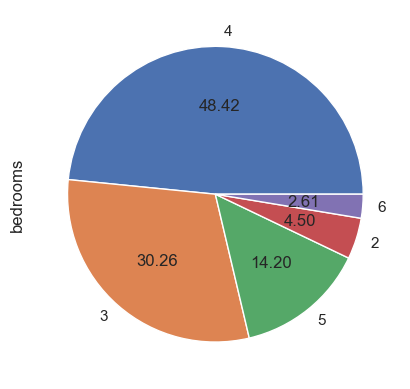

In [122]:
#Menampilkan visualisasi dari kategori rumah mahal
housesHighPrice['bedrooms'].value_counts().head().plot(kind='pie', autopct='%.2f')

Berdasarkan visualisasi jumlah kamar 4 merupakan jumlah yang paling banyak dimiliki oleh rumah dengan harga mahal

<Axes: ylabel='bedrooms'>

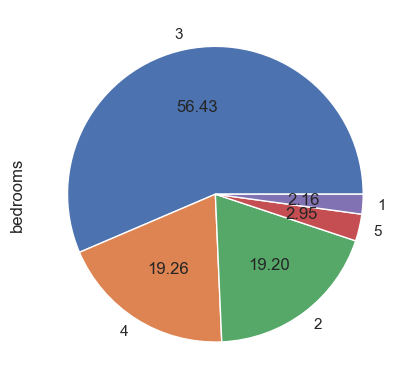

In [123]:
#Menampilkan visualisasi dari kategori rumah murah
housesLowPrice['bedrooms'].value_counts().head().plot(kind='pie', autopct='%.2f')

Berdasarkan visualisasi jumlah kamar 3 merupakan jumlah yang paling banyak dimiliki oleh rumah dengan harga murah

In [39]:
sns.set_theme()

Pada **rumah mahal** biasanya rumah tersebut memiliki ciri **jumlah kamar lebih dari 4**, 

dan pada **rumah murah** biasanya rumah tersebut memiliki ciri **jumlah kamar lebih dari 3.**

Data ini diambil berdasarkan **nilai jumlah kamar yang paling banyak muncul** pada kedua tipe harga rumah.

Memproses data latitude, longtitude, dan zipcode untuk mendapatkan nama lokasi rumah

In [51]:
#Membagi data berdasarkan kategori harga rumah menjadi data sampe untuk dicari lokasi kotanya
housesHighPriceSample = housesHighPrice.sort_values('price').head(500)
housesMidlePriceSample = housesMidlePrice.sort_values('price').head(500)
housesLowPriceSample = housesLowPrice.sort_values('price').head(500)

In [52]:
from geopy.geocoders import Nominatim

In [53]:
#Mendapatkan nama kota dari kategori harga rumah murah 

# Membuat DataFrame
dfLow = pd.DataFrame({'Latitude': housesLowPriceSample['lat'],
                   'Longitude': housesLowPriceSample['long'],
                   'Kode_Pos': housesLowPriceSample['zipcode']})

# Membuat kolom Kota baru
dfLow['Kota'] = None

# Inisialisasi geocoder
geolocator = Nominatim(user_agent='my_app')

# Mendapatkan nama kota berdasarkan latitude, longitude, dan kode pos
for index, row in dfLow.iterrows():
    location = geolocator.reverse([row['Latitude'], row['Longitude']])
    if location:
        address = location.raw['address']
        if 'town' in address:
            dfLow.loc[index, 'Kota'] = address['town']
        elif 'city' in address:
            dfLow.loc[index, 'Kota'] = address['city']
        elif 'village' in address:
            dfLow.loc[index, 'Kota'] = address['village']

# Menampilkan DataFrame
print(dfLow)

       Latitude  Longitude  Kode_Pos         Kota
1149    47.2638   -121.906     98022     Enumclaw
15293   47.4739   -122.280     98168      Tukwila
465     47.6499   -121.909     98014    Carnation
16198   47.4808   -122.315     98168       Burien
8274    47.4987   -122.341     98146       Burien
...         ...        ...       ...          ...
10397   47.3686   -122.081     98042    Covington
17367   47.4336   -122.197     98055       Renton
17123   47.7620   -122.321     98155    Shoreline
18908   47.3732   -122.295     98032         Kent
579     47.3062   -122.371     98023  Federal Way

[500 rows x 4 columns]


In [54]:
#Mendapatkan nama kota dari kategori harga rumah menengah 

# Membuat DataFrame contoh
dfMidle = pd.DataFrame({'Latitude': housesMidlePriceSample['lat'],
                   'Longitude': housesMidlePriceSample['long'],
                   'Kode_Pos': housesMidlePriceSample['zipcode']})

# Membuat kolom Kota baru
dfMidle['Kota'] = None

# Inisialisasi geocoder
geolocator = Nominatim(user_agent='my_app')

# Mendapatkan nama kota berdasarkan latitude, longitude, dan kode pos
for index, row in dfMidle.iterrows():
    location = geolocator.reverse([row['Latitude'], row['Longitude']])
    if location:
        address = location.raw['address']
        if 'town' in address:
            dfMidle.loc[index, 'Kota'] = address['town']
        elif 'city' in address:
            dfMidle.loc[index, 'Kota'] = address['city']
        elif 'village' in address:
            dfMidle.loc[index, 'Kota'] = address['village']

# Menampilkan DataFrame
print(dfMidle)

       Latitude  Longitude  Kode_Pos                     Kota
15849   47.5066   -122.175     98056                   Renton
1993    47.6829   -122.060     98053  Union Hill-Novelty Hill
17738   47.5076   -122.173     98056                   Renton
2494    47.4476   -121.771     98045                     None
13288   47.7035   -122.351     98133                  Seattle
...         ...        ...       ...                      ...
10631   47.5021   -121.770     98045               North Bend
8542    47.4683   -122.348     98166                   Burien
21535   47.2815   -122.356     98023              Federal Way
7949    47.6223   -122.294     98112                  Seattle
2161    47.3524   -122.285     98001                   Auburn

[500 rows x 4 columns]


In [55]:
#Mendapatkan nama kota dari kategori harga rumah mahal 

# Membuat DataFrame contoh
dfHigh = pd.DataFrame({'Latitude': housesHighPriceSample['lat'],
                   'Longitude': housesHighPriceSample['long'],
                   'Kode_Pos': housesHighPriceSample['zipcode']})

# Membuat kolom Kota baru
dfHigh['Kota'] = None

# Inisialisasi geocoder
geolocator = Nominatim(user_agent='my_app')

# Mendapatkan nama kota berdasarkan latitude, longitude, dan kode pos
for index, row in dfHigh.iterrows():
    location = geolocator.reverse([row['Latitude'], row['Longitude']])
    if location:
        address = location.raw['address']
        if 'town' in address:
            dfHigh.loc[index, 'Kota'] = address['town']
        elif 'city' in address:
            dfHigh.loc[index, 'Kota'] = address['city']
        elif 'village' in address:
            dfHigh.loc[index, 'Kota'] = address['village']

# Menampilkan DataFrame
print(dfHigh)

       Latitude  Longitude  Kode_Pos                     Kota
17519   47.6786   -122.379     98117                  Seattle
18596   47.5394   -121.875     98065               Snoqualmie
10388   47.5598   -122.018     98029                Sammamish
2555    47.7497   -122.245     98028                  Kenmore
10441   47.5615   -122.131     98006                 Bellevue
...         ...        ...       ...                      ...
17039   47.6406   -122.317     98102                  Seattle
2148    47.6726   -122.380     98107                  Seattle
14925   47.6472   -122.383     98199                  Seattle
12592   47.6811   -122.283     98115                  Seattle
6070    47.6798   -122.033     98053  Union Hill-Novelty Hill

[500 rows x 4 columns]


Mengatur dataframe baru pada sample untuk dilakukan analisa

In [56]:
#Membuat kolom baru pada dataset sample pada tiap kategori harga rumah
housesLowPriceSample['Kota'] = dfLow['Kota']
housesMidlePriceSample['Kota'] = dfMidle['Kota']
housesHighPriceSample['Kota'] = dfHigh['Kota']

In [57]:
#Menghitung kemunculan kota terbanyak pada kategori rumah murah
housesLowPriceSample['Kota'].value_counts().head()

Seattle        108
Auburn          57
Renton          47
Federal Way     47
Burien          44
Name: Kota, dtype: int64

[Text(0, 0, '108'),
 Text(0, 0, '57'),
 Text(0, 0, '47'),
 Text(0, 0, '47'),
 Text(0, 0, '44')]

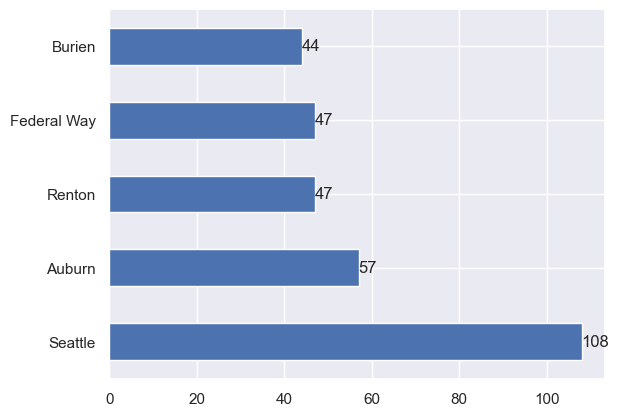

In [124]:
#Visualisasi terhadap kemunculan kota pada kategori rumah murah
ax = housesLowPriceSample['Kota'].value_counts().head().plot(kind='barh')
ax.bar_label(ax.containers[0])

Berdasarkan visualisasi kemunculan kota terbanyak pada kategori rumah murah banyak pada daerah Seattle dengan 108 data dan Auburn dengan kemunculan 57 data

In [59]:
#Menghitung kemunculan kota terbanyak pada kategori rumah menengah
housesMidlePriceSample['Kota'].value_counts().head()

Seattle      141
Renton        65
Kent          50
Shoreline     28
Auburn        26
Name: Kota, dtype: int64

[Text(0, 0, '141'),
 Text(0, 0, '65'),
 Text(0, 0, '50'),
 Text(0, 0, '28'),
 Text(0, 0, '26')]

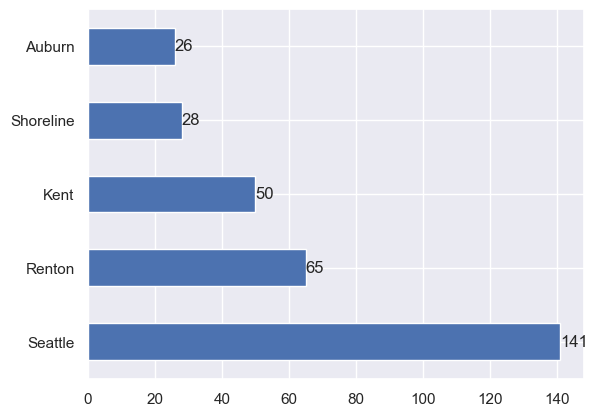

In [125]:
#Visualisasi terhadap kemunculan kota pada kategori rumah menengah
ax = housesMidlePriceSample['Kota'].value_counts().head().plot(kind='barh')
ax.bar_label(ax.containers[0])

Berdasarkan visualisasi kemunculan kota terbanyak pada kategori rumah menengah banyak pada daerah Seattle dengan 141 data dan Renton dengan kemunculan 65 data

In [61]:
#Menghitung kemunculan kota terbanyak pada kategori rumah mahal
housesHighPriceSample['Kota'].value_counts().head()

Seattle      206
Sammamish     57
Bellevue      54
Kirkland      27
Redmond       21
Name: Kota, dtype: int64

[Text(0, 0, '206'),
 Text(0, 0, '57'),
 Text(0, 0, '54'),
 Text(0, 0, '27'),
 Text(0, 0, '21')]

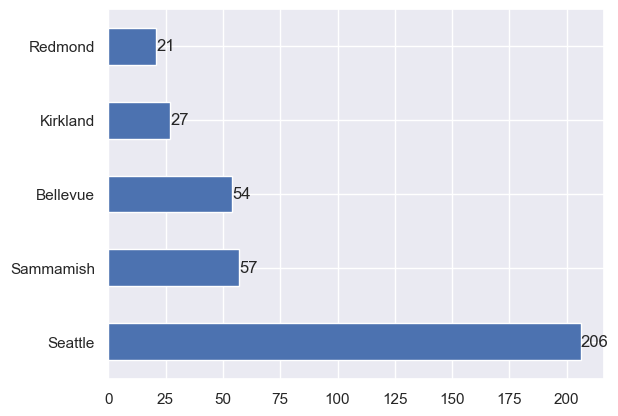

In [126]:
#Visualisasi terhadap kemunculan kota pada kategori rumah mahal
ax = housesHighPriceSample['Kota'].value_counts().head().plot(kind='barh')
ax.bar_label(ax.containers[0])

Berdasarkan visualisasi kemunculan kota terbanyak pada kategori rumah mahal banyak pada daerah Seattle dengan 206 data dan Sammamish dengan kemunculan 57 data

Berdasarkan **analisa terhadap letak kota** yang paling banyak muncul, sebagai faktor yang mempengaruhi harga didapatkan bahwa:

Rumah dengan **kategori murah** lebih banyak didapatkan di daerah **Auburn** dan **Renton**

Rumah dengan **kategori menengah** lebih banyak didapatkan di daerah 
**Renton** dan **Kent**

Rumah dengan **kategori mahal** lebih banyak didapatkan di daerah
**Sammamish** dan **Belleuve**

Untuk daerah Seattle merupakan daerah kota yang memiliki banyak varisasi rumah dengan berbagai harga.

##### 2. Dimana daerah rumah yang memiliki harga yang mahal? (berdasarkan kode post nya)

In [63]:
#Menghitung kemunculan kota terbanyak pada kategori rumah mahal
housesHighPriceSample['Kota'].value_counts().head()

Seattle      206
Sammamish     57
Bellevue      54
Kirkland      27
Redmond       21
Name: Kota, dtype: int64

Berdasarkan kode post pada dataset sample, didapat daerah rumah yang memiliki harga mahal antara lain pada daerah 

**Seattle**      dengan jumlah **206** rumah,
**Sammamish**     dengan jumlah **57** rumah,
**Bellevue**      dengan jumlah **54** rumah,
**Kirkland**      dengan jumlah **27** rumah,
**Redmond**       dengan jumlah **21** rumah

##### 3. Pada harga rumah termahal, berapa harga tanah per-perseginya? 

In [64]:
#Mencari rumah dengan harga termahal
houses['price'].max()

7700000.0

In [65]:
#Setelah didapat harga rumah termahal, cari ID rumah tersebut berdasarkan harganya
rumahMahal = houses[houses['price'] == 7700000.0]
rumahMahal

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,kategori
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800,Very High Price


In [66]:
#Menghitung harga tanahnya per-persegi dengan membagi harga rumah dengan luas tanahnya
hargaTanah = rumahMahal['price'] / rumahMahal['sqft_lot']
hargaTanah

7252    278.985507
dtype: float64

Berdasarkan harga **rumah termahal**, didapati **harga tanah per-perseginya** senilai **278.985507**

#### 4. Berapa data penjualan rumah perbulannya pada tiap tahunnya? 

In [156]:
#Membagi data pertahunnya
houses2014 = houses[houses['date'].dt.year == 2014].sort_values('date')
houses2015 = houses[houses['date'].dt.year == 2015].sort_values('date')

In [68]:
#Menampilkan data penjualan 2014
houses2014['date'].dt.month.value_counts().sort_index()

5     1768
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: date, dtype: int64

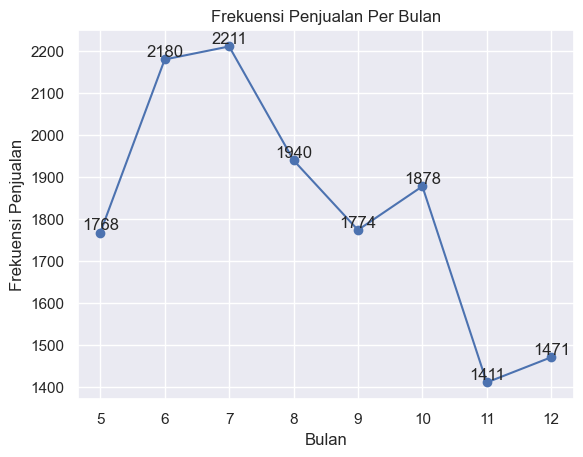

In [159]:
#Visualisasi terhadap penjualan 2014
line2014 = houses2014['date'].dt.month.value_counts().sort_index()

# Membuat line plot dari data frekuensi penjualan per bulan
plt.plot(line2014.index, line2014, marker='o', linestyle='-')

# Menampilkan nilai pada setiap titik data
for i, count in enumerate(line2014):
    plt.text(line2014.index[i], count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Penjualan')
plt.title('Frekuensi Penjualan Per Bulan')

# Display the plot
plt.show()

Frekuensi penjualan terbanyak didapati pada bulan 7 pada tahun 2014 dengan total 2211 transaksi yang terjadi.

In [157]:
#Menampilkan data penjualan 2015
houses2015['date'].dt.month.value_counts().sort_index()

1     978
2    1250
3    1875
4    2231
5     646
Name: date, dtype: int64

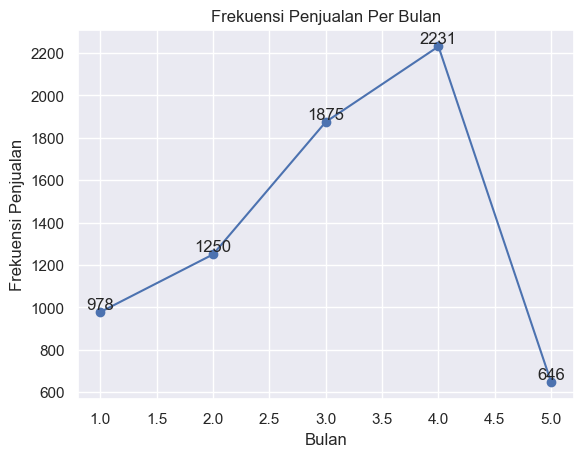

In [167]:
#Visualisasi terhadap penjualan 2015
line2015 = houses2015['date'].dt.month.value_counts().sort_index()

# Membuat line plot dari data frekuensi penjualan per bulan
plt.plot(line2015.index, line2015, marker='o', linestyle='-')

# Menampilkan nilai pada setiap titik data
for i, count in enumerate(line2015):
    plt.text(line2015.index[i], count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Penjualan')
plt.title('Frekuensi Penjualan Per Bulan')

# Display the plot
plt.show()


Frekuensi penjualan terbanyak didapati pada bulan 4 pada tahun 2014 dengan total 2231 transaksi yang terjadi.

Berdasarkan analisi pada **tahun 2014** penjualan terbanyak didapat pada **bulan 7 dengan 2211 penjualan**.

Berdasarkan analisi pada **tahun 2015** penjualan terbanyak didapat pada **bulan 4 dengan 2231 penjualan**.

#### 5. Bagaimana tren harga perumahan dalam tahun 2014-2015 di suatu wilayah?

Memilih kota Seattle untuk dilakukan analisa

In [96]:
#Membuat dataframe baru
lowSeattle = housesLowPriceSample[housesLowPriceSample['Kota'] == 'Seattle']

In [97]:
lowSeattle.set_index('date', inplace=True)

In [170]:
#Mencari nilai rata-rata harga tiap bulannya
seattle_monthly = lowSeattle['price'].resample('M').mean().round()
seattle_monthly

date
2014-05-31    149444.0
2014-06-30    155114.0
2014-07-31    150861.0
2014-08-31    134100.0
2014-09-30    145200.0
2014-10-31    147684.0
2014-11-30    151094.0
2014-12-31    154625.0
2015-01-31    152470.0
2015-02-28    154967.0
2015-03-31    150008.0
2015-04-30    131975.0
2015-05-31    158000.0
Freq: M, Name: price, dtype: float64

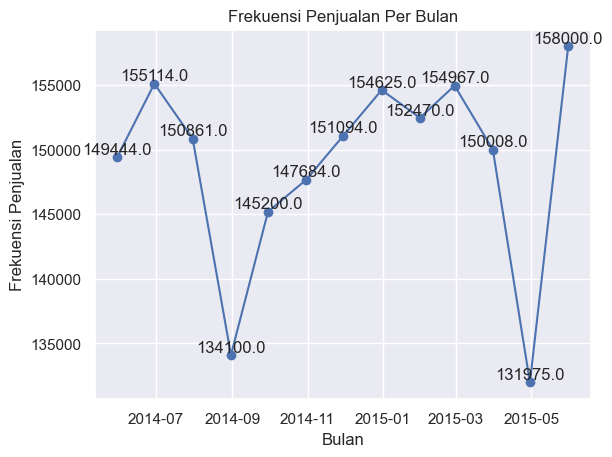

In [171]:
# seattle_monthly.plot(kind='line')

# Menghitung frekuensi penjualan per bulan dan mengurutkannya berdasarkan indeks bulan
line_seattle = seattle_monthly

# Membuat line plot dari data frekuensi penjualan per bulan
plt.plot(line_seattle.index, line_seattle, marker='o', linestyle='-')

# Menampilkan nilai pada setiap titik data
for i, count in enumerate(line_seattle):
    plt.text(line_seattle.index[i], count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Penjualan')
plt.title('Frekuensi Penjualan Per Bulan')

# Display the plot
plt.show()


Berdasarkan analisa, penjualan termahal terjadi pada bulan **May 2015** sebagai bulan yang paling menguntungkan dalam penjualan dengan jumlah 1580000

6. Jika ada yang ingin menjual rumah dengan kategori 8 diperkirakan di kisaran harga berapa rumah tersebut pantas untuk dijual. Hitung central tendency terhadap data yang tidak ada outliers nya dan hitung confidence interval terhadap harga rumahnya. 

In [100]:
#Membuat dataframe baru dengan kategori grade 8
grade8 = houses[houses['grade'] == 8]

Membuat fungsi untuk dilakukan pengujian dan pencarian terhadap nilai outline dan mengetahui Skewness pada sample data yang dipiih

In [101]:
def plot_dist(grade8, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(grade8[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(grade8[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(grade8[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=grade8[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(grade8[col].name + ' Kurtosis: ' + str(grade8[col].kurt()))
    print(grade8[col].name + ' Skewness: ' + str(grade8[col].skew()))
    if -0.5 <= grade8[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif grade8[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif grade8[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [102]:
df_col = grade8.columns.tolist()
df_col

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'kategori']

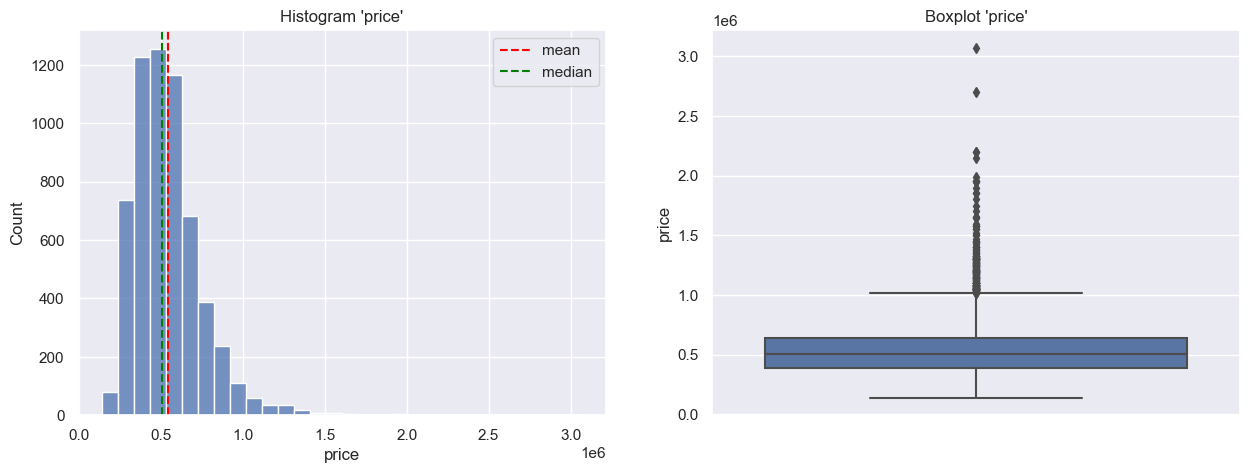

price Kurtosis: 9.89976225098415
price Skewness: 2.0143008168119456
Columns 'price' right skewed


In [103]:
plot_dist(grade8, df_col[2])

Berdasarkan pengujian, data dengan grade 8 memiliki nilai skewness sebesar '2.0143008168119456' dan merupakan 'right skewed'

In [106]:
#Mencari nilai kuartile untuk selanjutnya dilakukan proses pembersihan outliers
quartiles = np.percentile(grade8['price'], [25, 50, 75])
quartiles

array([390000., 510000., 640000.])

In [107]:
#Mencari Min dan Max threshold untuk handling outliers nya
min_threshold = quartiles[0] - 1.5 *(quartiles[1] - quartiles[0] )
max_threshold = quartiles[2] + 1.5 *(quartiles[1] - quartiles[0] )

In [108]:
#Filter outliers
grade8_no_outliers = grade8[(grade8['price']>= min_threshold)&(grade8['price']<= max_threshold)]

In [109]:
#Menampilkan data terbaru yang sudah bersih dari outliers nya
def plot_dist(grade8_no_outliers, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(grade8_no_outliers[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(grade8_no_outliers[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(grade8_no_outliers[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=grade8_no_outliers[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(grade8_no_outliers[col].name + ' Kurtosis: ' + str(grade8_no_outliers[col].kurt()))
    print(grade8_no_outliers[col].name + ' Skewness: ' + str(grade8_no_outliers[col].skew()))
    if -0.5 <= grade8_no_outliers[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif grade8_no_outliers[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif grade8_no_outliers[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

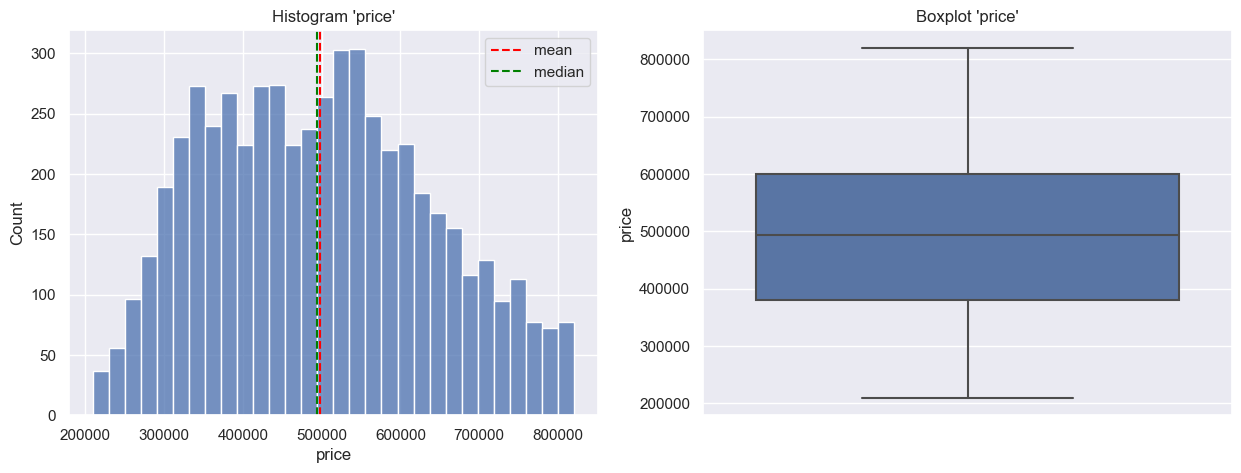

price Kurtosis: -0.7748030117334026
price Skewness: 0.22595037350422048
Columns 'price' normal distribution


In [111]:
df_col = grade8_no_outliers.columns.tolist()
plot_dist(grade8_no_outliers, df_col[2])

Selanjutnya dicari juga perbandingan Central Tendency(mean, median, mode) antara data yang masih ada outliner dan data yang sudah tidak ada outlinernya.

In [112]:
#Mean
grade8NoOutMean = grade8_no_outliers['price'].mean()
grade8OutMean = grade8['price'].mean()

print('Mean data yang bersih dari outliers:', grade8NoOutMean)
print('Mean data yang ada outliers:', grade8OutMean)

Mean data yang bersih dari outliers: 497505.4815555152
Mean data yang ada outliers: 542852.7656558998


In [113]:
#Median
grade8NoOutMedian = grade8_no_outliers['price'].median()
grade8OutMedian = grade8['price'].median()

print('Mean data yang bersih dari outliers:', grade8NoOutMedian)
print('Mean data yang ada outliers:', grade8OutMedian)

Mean data yang bersih dari outliers: 494000.0
Mean data yang ada outliers: 510000.0


In [114]:
#Modus
grade8NoOutModus = grade8_no_outliers['price'].mode()
grade8OutModus = grade8['price'].mode()

print('Mean data yang bersih dari outliers:', grade8NoOutModus)
print('Mean data yang ada outliers:', grade8OutModus,)

Mean data yang bersih dari outliers: 0    550000.0
Name: price, dtype: float64
Mean data yang ada outliers: 0    550000.0
Name: price, dtype: float64


Berdasarkan nilai central tendency yang didapat, dijelaskan bahwa mean pada data yang bersih dari outlier: **497505.4815555152** dan data yang ada outliers: **542852.7656558998**

median pada data yang bersih dari outlier: **494000** dan data yang ada outliers: **510000**

modus pada data yang bersih dari outlier dan data yang ada outliers: **550000**

Perbedaan value yang didapatkan disebabkan oleh adanya perbedaan data antara data right skew dan normal distribution hasil clean outliers.

Menganalisa data untuk dimulai mencari perhitungan dari Confidence Interval nya

In [115]:
#Membuat dataframe baru untuk mencari nilai CI nya
grade8_no_outliers2015 = grade8_no_outliers[grade8_no_outliers['date'].dt.year == 2015]

In [116]:
grade8_Clear = grade8_no_outliers2015[['date','price']].groupby('date').sum()
grade8_Clear

,price
date,
2015-01-02,7142700.0
2015-01-05,9601376.0
2015-01-06,3891600.0
2015-01-07,7858675.0
2015-01-08,6643000.0
...,...
2015-05-09,812000.0
2015-05-11,3478900.0
2015-05-12,5606000.0


Melakukan perhitungan CI

In [117]:
from scipy.stats import t

# calculate the mean and standard deviation of the sample
sample_mean = np.mean(grade8_Clear,axis=0)
sample_std = np.std(grade8_Clear)

# set the level of confidence (e.g., 95%)
conf_level = 0.95

# calculate the degrees of freedom
df = len(grade8_Clear) - 1

# calculate the t-value for the confidence level and degrees of freedom
t_val = t.ppf(conf_level, df)

# calculate the standard error of the mean
std_err = sample_std / np.sqrt(len(grade8_Clear))

# calculate the margin of error
margin_err = t_val * std_err

# calculate the confidence interval
conf_int = (sample_mean - margin_err, sample_mean + margin_err)

print('Sample mean:', sample_mean)
print('Standard deviation:', sample_std)
print('Confidence level:', conf_level)
print('Degrees of freedom:', df)
print('t-value:', t_val)
print('Standard error of the mean:', std_err)
print('Margin of error:', margin_err)
print('Confidence interval:', conf_int)

Sample mean: price    7.361904e+06
dtype: float64
Standard deviation: price    4.703210e+06
dtype: float64
Confidence level: 0.95
Degrees of freedom: 117
t-value: 1.6579816587044385
Standard error of the mean: price    432965.612616
dtype: float64
Margin of error: price    717849.044568
dtype: float64
Confidence interval: (price    6.644055e+06
dtype: float64, price    8.079753e+06
dtype: float64)


Berdasarkan analisa yang dilakukan, menggunakan dataset yang sudah bersih dari outliers pada tahun 2015 dengan rumah grade 8 maka prediksi rata-rata sale price populasi antara lain di kisaran harga **6644055.0** hingga harga **8079753.0** merupakan harga yang layak untuk penjualan rumah disaat itu.

#### Pengambilan Kesimpulan

Berdasarkan analisa yang telah dilakukan didapatkan bahwa:

Faktor-faktor yang mempengaruhi harga rumah antara lain :
- Jumlah waterfront nya, dimana rumah mahal memiliki view perairan lebih banyak di banding rumah murah.
- Berdasarkan perhitungan sqft_lot / luas tanah pada masing-masing rumah. Rumah dengan kategori mahal memiliki tanah yang lebih luas dibandingkan dengan rumah dengan harga murah.
- Pada rumah mahal biasanya rumah tersebut memiliki ciri jumlah kamar lebih banyak dan pada rumah murah.
- Berdasarkan analisa terhadap letak kota yang paling banyak muncul, Rumah dengan kategori murah lebih banyak didapatkan di daerah Auburn dan Renton. Rumah dengan kategori mahal lebih banyak didapatkan di daerah Sammamish dan Belleuve.

Pada rumah termahal, didapati harga tanah per-perseginya senilai 278.985507. Pada tahun 2014 penjualan terbanyak didapat pada bulan 7 dan pada tahun 2015 penjualan terbanyak didapat pada bulan 4. Sedangkan untuk penjualan terlaris dan ter untung tejadi pada bulan Mei 2015.

Berdasarkan analisa yang dilakukan, menggunakan dataset yang sudah bersih dari outliers pada tahun 2015 dengan rumah grade 8 maka prediksi rata-rata sale price antara lain di kisaran harga 6644055.0 hingga harga 8079753.0 merupakan harga yang layak untuk penjualan rumah disaat itu.

**Berdasarkan analisa yang dilakukan dapat dijawab bahwa kondisi rumah, fasilitas, lokasi suatu daerah dapat mempengaruhi harga suatu rumah yang dijual pada tahun 2014-2015** 